          chrom  length   bases   mean  min  max  source_file
0  Tb927.3.4350    7393   69501   9.40    0   35  SRR27466596
1   Tb927.4.980    6118   70963  11.60    0   19  SRR27466596
2  Tb927.5.1220    5566  116095  20.86    0   41  SRR27466596
3  Tb927.6.1100    6478   39142   6.04    0   12  SRR27466596
4  Tb927.6.2630    6319  101916  16.13    2   28  SRR27466596


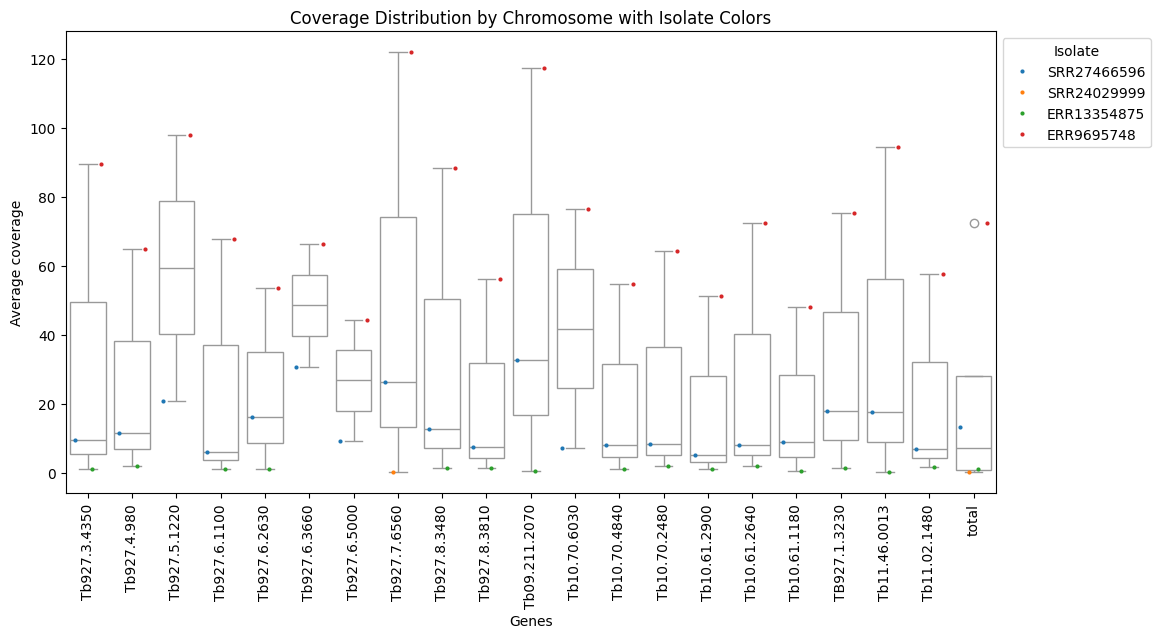

In [1]:
import os 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import seaborn as sns 

# Load the CSV with tab separation
file_path = "combined_data.csv"
df = pd.read_csv(file_path, sep='\t')

# Ensure the last column is correctly split
df[['max', 'source_file']] = df['max,source_file'].str.split(',', expand=True)

# Drop the incorrectly parsed column
df = df.drop(columns=['max,source_file'])

# Convert numeric columns to the proper data types
df[['length', 'bases', 'mean', 'min', 'max']] = df[['length', 'bases', 'mean', 'min', 'max']].apply(pd.to_numeric)

# Display the cleaned DataFrame
print(df.head())

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='chrom', y='mean', data=df, color='white')
sns.stripplot(x='chrom', y='mean', data=df, hue='source_file', size=3, jitter=True, dodge=True)

plt.xticks(rotation=90)
plt.xlabel('Genes')
plt.ylabel('Average coverage')
plt.title('Coverage Distribution by Chromosome with Isolate Colors')

plt.legend(title="Isolate", bbox_to_anchor=(1, 1))
plt.show()


